## Time Series Assignment

* Student: **Perakis Georgios**
* Code: **DS3616014**
* Contact: **gperakis[at]aueb.gr**

## Description

The data you will have to analyze are in the eclass in the **excel data-assignment.xls**
file. The **dependent variables** for which you will construct the models you are asked
for, are the **returns** of four investment vechicles **(Y1, Y2, Y3, Y4)** for the period **1/1991 - 12/2005**.

The **independent variables** you will use in the models refer to **monthly** values/returns for the variables:
* x1 = RUS-Rf
* x2 = RUS (-1) -Rf (-1) lagged Russel index
* x3 = MXUS-Rf
* x4 = MEM- Rf
* x5 = SMB
* x6 = HML
* x7 = MOM
* x8 = SBGC-Rf
* x9 = SBWG-Rf
* x10 = LHY-Rf
* x11 = DEFSPR
* x12 = FRSI-Rf
* x13 = GSCI-Rf
* x14 = VIX

for the period **1/1991 - 12/2005**.

Analyze dependent variables based on data for the period 1/1991 - 12/2004 **[You will not use the data for the period 1/2005 - 12/2005]**:

1. Construct an appropriate **time series** model (AR, MA, ARMA).
2. Develop an appropriate **regression** model
  * In case of **autocorrelation** problem of **regression residuals**, correct the autocorrelation problem (using time series AR, MA, ARMA models).
  * In case of **heteroscedasticity** problem of **regression residuals**, correct the
    heteroskedasticity problem (using time-varying ARCH, GARCH models).
3. Write the models you have found at questions (1) - (2). Assess the **goodness of fit** of these models based on the **AIC and BIC** information criteria.
4. Based on the estimated models of questions (1) - (2), **construct forecasts** of the analyzed series for the period **1/2005 - 12/2005**, and **evaluate the forecasts** you have found by using two evaluation criteria:
  * the mean square prediction error
  * the Hit ratio (indicates the percentage of predictions that correctly evaluate the sign of the actual value of the dependent variable.)
  
Each student will have to analyze **two only dependent variables**

### Load Libraries

In [3]:
# loads the library urca, which contains the command ur.df() 
# and applies Unit-Root Testing based on Dickey-Fuller test 
library(urca)
library(tseries)

In [5]:
# Importing data into R can be carried out in various ways. Below, the command read.table is used:
data_all = read.table('/home/george/Desktop/AUEB/Time Series Analysis/time_series_in_r/Data-Assignment-Feb-2018.txt')

In [6]:
head(data_all)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0.02058,0.02058,0.00468,0.01468,0.04568,0.01745,0.02313,0.07273,0.0389,-0.0181,-0.0946,0.00575,0.01937,0.01868,0.0001,0.00004,-0.10389,-0.0547
0.03503,0.02583,0.03903,0.03623,0.06346,0.04568,0.09344,0.13201,0.0397,-0.0056,-0.1147,0.00144,-0.00486,0.10639,-0.0014,-0.01039,0.00866,0.0032
0.04458,0.02168,0.02878,0.06348,0.02225,0.06346,-0.06591,0.03187,0.0395,-0.0124,-0.0407,0.00253,-0.04193,0.02621,-0.0024,0.03228,0.03201,-0.0435
0.00865,0.01325,0.02585,0.04855,-0.00581,0.02225,0.00371,-0.00174,0.0037,0.0170,-0.0224,0.00790,0.01053,0.01619,-0.0008,0.01107,0.01764,0.0136
0.01507,0.00227,0.02377,0.00887,0.03258,-0.00581,0.00577,0.06795,-0.0037,-0.0052,0.0282,-0.00023,-0.00601,-0.00780,-0.0011,0.00235,-0.00524,-0.0231
-0.00064,-0.00924,-0.00234,0.01246,-0.05360,0.03258,-0.07982,-0.04322,0.0006,0.0102,0.0010,-0.00499,-0.01526,0.01826,-0.0011,0.01085,-0.02869,0.0362


### Question 1 

In [7]:
y1 <- data_all$V1

###### Let create a time series object using the function “ts” from a vector - single time-series or a matrix - multivariate time-series. The data consist of the Y1 monthly returns from 1/1991 - 12/2004, 

In [8]:
j1 = ts(y1, frequency=12, start = c(1991, 1), end = c(2004, 12))

In [9]:
head(y1)

[1]  0.02058  0.03503  0.04458  0.00865  0.01507 -0.00064

In [10]:
j1

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1991  0.02058  0.03503  0.04458  0.00865  0.01507 -0.00064  0.02146  0.01603
1992  0.03512  0.01805  0.00244 -0.00016  0.01523 -0.00714  0.01809 -0.00539
1993  0.02073  0.01090  0.02813  0.01244  0.02339  0.02362  0.01831  0.02673
1994  0.02248 -0.00837 -0.01808 -0.00920  0.00323 -0.00083  0.00986  0.02070
1995 -0.00720  0.00815  0.01160  0.01610  0.01214  0.02008  0.02735  0.01746
1996  0.02469  0.00813  0.01031  0.03531  0.02619 -0.00250 -0.02523  0.01839
1997  0.02741  0.00595 -0.02085 -0.00547  0.03968  0.02269  0.03433 -0.00096
1998 -0.01142  0.02826  0.02570  0.00545 -0.02498 -0.00555 -0.01213 -0.09108
1999  0.01868 -0.01712  0.02765  0.04121  0.00332  0.03232  0.00124 -0.00425
2000  0.00167  0.05677  0.00440 -0.03334 -0.02430  0.03191 -0.01117  0.03285
2001  0.02974 -0.02613 -0.01948  0.01626  0.00894 -0.00012 -0.01125 -0.00691
2002  0.00303 -0.00848  0.01761  0.00134 -0.00104 -0.02079 -0.03000  0.00393

Since we are talking about **returns** we **don't** need to take to logs and the differences of the logs

### The time series plot and the histogram for the Y1 data is given by

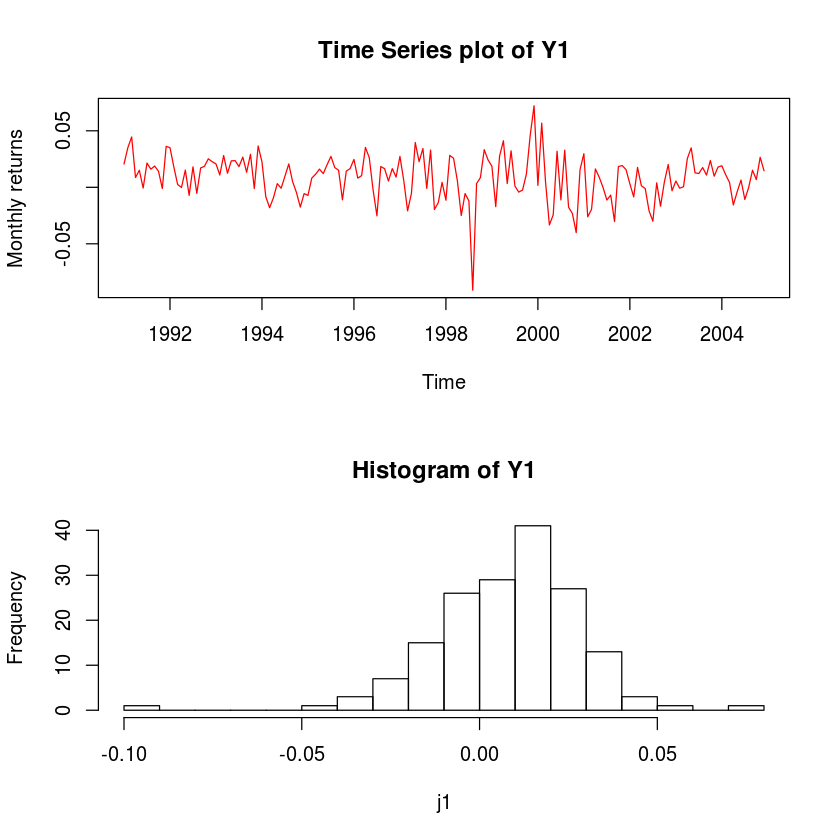

In [11]:
# set up the graphics
par(mfrow=c(2, 1))      

plot(j1, type="l", col='red',
     lwd=1, main="Time Series plot of Y1", 
     ylab="Monthly returns")

hist(j1, nclass=20, main="Histogram of Y1")

#### The autocorrelation and partial autocorrelation plots are useful to examine if there is dependence between lagged values of the analyzed series

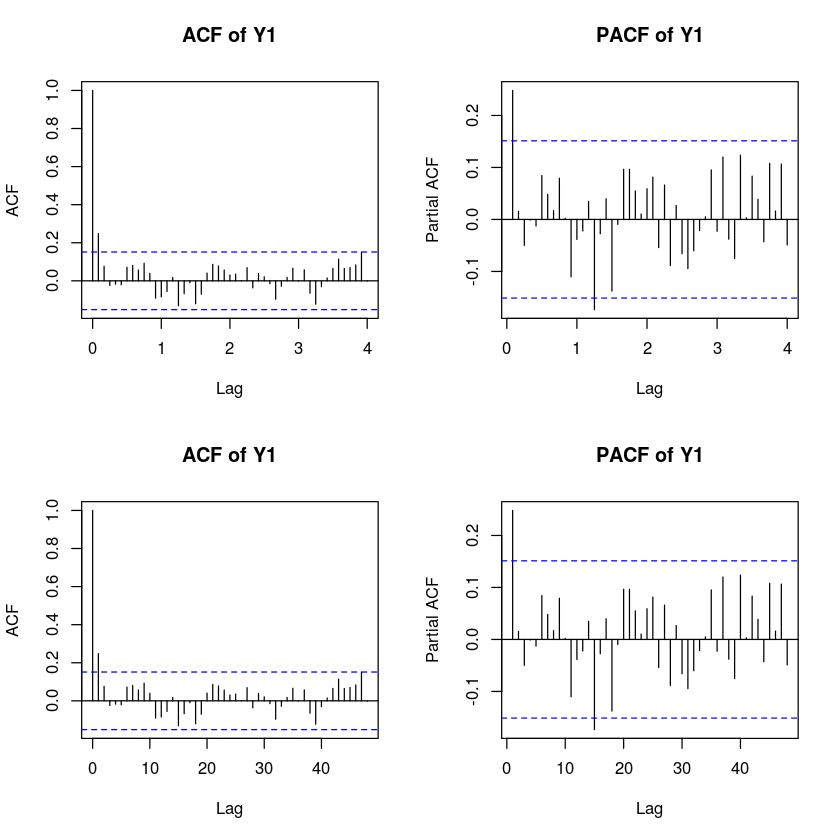

In [13]:
# Create Autocorrelation and partial autocorrelation plots
par(mfrow=c(2, 2)) # set up the graphics  

acf(j1, 48, main="ACF of Y1")        # autocorrelation function plot 
pacf(j1, 48, main="PACF of Y1")    # partial autocorrelation function 

acf(ts(j1, freq=1), 48, main="ACF of Y1")        # autocorrelation function plot 
pacf(ts(j1, freq=1), 48, main="PACF of Y1") 

We must note that in the autocorrelation plots presented above, the **dashed lines** are the approximate **two standard error confidence bounds** computed by ± 1,96* (1 / T), where T is the number observations.

If the autocorrelation is within these bounds, it is not significantly different from zero at (approximately)
5% level of significance.

So we conclude  that:

* From **ACF plot** we observe that we have **autocorrelation for lag=1**. We must check an autoregressive model for lag=1. **(AR(1))**
* From **PACF plot** we observe that we also have **partial autocorrelation for lag=1 and lag=15**. We must check a moving average model for lag=1 and lag=15. **(MA(1) and MA(15))**

### UNIT ROOT TESTING

First, we can fit an **autoregressive time series model** to the Y1 data, by selecting the complexity of the
model **based on AIC**. Then, we perform an **augmented Dickey-Fuller test** of unit root, based on a model
with constant and trend 

In [14]:
# Unit root testing for the Y1 series
# Fits an autoregressive model, and selects the best AR order based on AIC
m1 = ar(j1)
m1
paste('Order:', m1$order)


Call:
ar(x = j1)

Coefficients:
     1  
0.2481  

Order selected 1  sigma^2 estimated as  0.0003725

[1] "Order: 1"

In [15]:
m11 <- ur.df(j1, type='none', lags=m1$order-1)
m11
summary(m11)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -8.7817 



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.086629 -0.006201  0.007275  0.018381  0.056157 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
z.lag.1 -0.63308    0.07209  -8.782 1.91e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02017 on 166 degrees of freedom
Multiple R-squared:  0.3172,	Adjusted R-squared:  0.3131 
F-statistic: 77.12 on 1 and 166 DF,  p-value: 1.911e-15


Value of test-statistic is: -8.7817 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [16]:
# Unit root testing for the Y1 series
# Fits an autoregressive model, and selects the best AR order based on AIC
m12 <- ur.df(j1, type="drift", lags=m1$order-1)
m12
summary(m12)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -9.9769 49.7692 



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.094517 -0.011083  0.001633  0.012123  0.054239 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.006449   0.001631   3.953 0.000114 ***
z.lag.1     -0.751732   0.075348  -9.977  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01934 on 165 degrees of freedom
Multiple R-squared:  0.3763,	Adjusted R-squared:  0.3725 
F-statistic: 99.54 on 1 and 165 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.9769 49.7692 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


* The Critical Value (CV) for 5% is -2.88
* The value of the test statistic for lag=1 with drift is: -7.7644
* Both Intercept and z.lag.1 are statistically significant

Obviously, the null hypothesis of non-stationarity for the Y1 series is rejected. Therefore the returns of Y1 seem to be a stationary process.

In [18]:
m13 <- ur.df(j1, type="trend", lags=m1$order-1)
m13
summary(m13)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -10.1882 34.6052 51.9076 



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.094640 -0.012259  0.001255  0.011391  0.056413 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.126e-02  3.198e-03   3.520 0.000558 ***
z.lag.1     -7.761e-01  7.618e-02 -10.188  < 2e-16 ***
tt          -5.475e-05  3.138e-05  -1.745 0.082899 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01922 on 164 degrees of freedom
Multiple R-squared:  0.3876,	Adjusted R-squared:  0.3802 
F-statistic: 51.91 on 2 and 164 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.1882 34.6052 51.9076 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75  4.07
phi3  8.43  6.49  5.47


###   

We focus on the stationary time series, i.e. the monthly returns.
We can:
* **test for normality of Y1**
* **create the plot of the histogram together with a density plot**
* **also create the normal QQplot**


	Shapiro-Wilk normality test

data:  y1
W = 0.96158, p-value = 7.636e-05


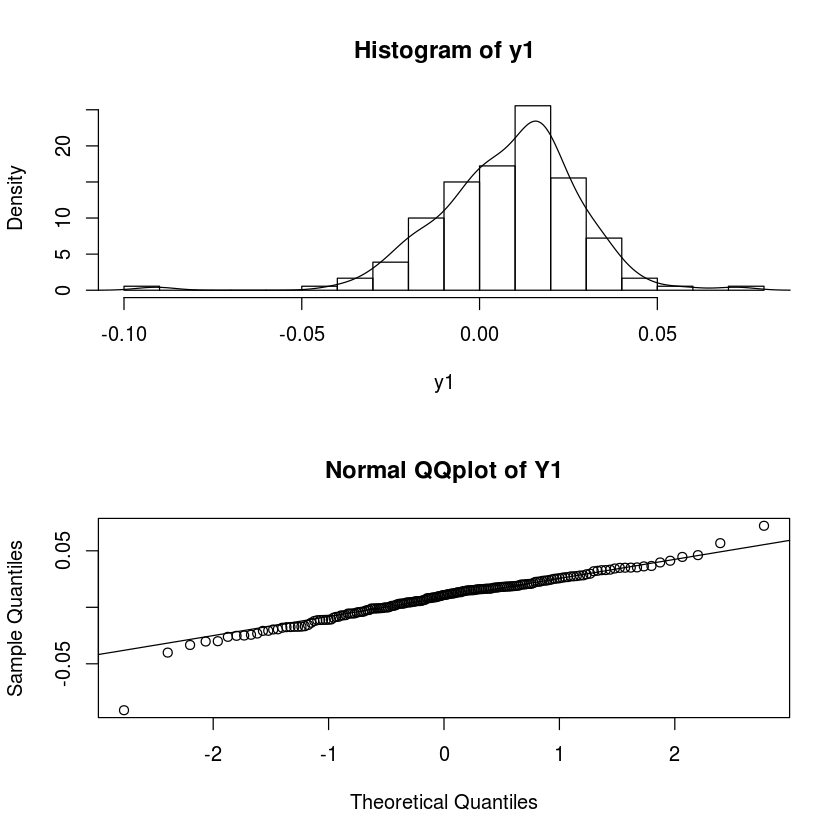

In [21]:
# Shapiro test of normality
shapiro.test(y1)

par(mfrow=c(2,1))
hist(y1, prob=TRUE, 20) # histogram
lines(density(y1))
# smooth it - ?density for details
qqnorm(y1, main="Normal QQplot of Y1") # normal Q-Q plot
qqline(y1) # add a line

#### Conclusions:
* From Shapiro Wilk test we **reject** the Null hypothesis for Normality.'
* From the Histogram we see a small deviance from Normality
* From the QQplot we see several points off the qqline.

So we conclude that we **don't have Normality**

### Estimation of ARMA models

#### We firstly check the moving average of lag=1 model (MA(1))

In [22]:
ma1fit=arima(y1, order=c(0,0,1))
ma1fit


Call:
arima(x = y1, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.2151     0.0084
s.e.  0.0669     0.0017

sigma^2 estimated as 0.0003589:  log likelihood = 458.5,  aic = -911

**The estimated model (MA(1) can be written in the form:**

$$y_{t} - 0.0084 = 0.2151* e_{t-1} + e_{t}$$

**or** 

$$y_{t} = 0.0084 + 0.2151* e_{t-1} + e_{t}$$


In [23]:
ma15restricted <- arima(y1,
                        order=c(0, 0, 15),
                        fixed=c(NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, NA,NA))
ma15restricted


Call:
arima(x = y1, order = c(0, 0, 15), fixed = c(NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, NA, NA))

Coefficients:
         ma1  ma2  ma3  ma4  ma5  ma6  ma7  ma8  ma9  ma10  ma11  ma12  ma13
      0.2079    0    0    0    0    0    0    0    0     0     0     0     0
s.e.  0.0662    0    0    0    0    0    0    0    0     0     0     0     0
      ma14     ma15  intercept
         0  -0.1185     0.0083
s.e.     0   0.0715     0.0015

sigma^2 estimated as 0.0003532:  log likelihood = 459.83,  aic = -911.66

**The estimated model (Restricted MA(15) can be written in the form:**

$$y_{t} - 0.0083 = 0.2079* e_{t-1} -0.1185 * e_{t-15} + e_{t}$$

**or** 

$$y_{t} = 0.0083 + 0.2079* e_{t-1} -0.1185* e_{t-15} + e_{t}$$

### Conclusion on MA models:
* Both models MA(1) and restricted MA(15) have almost the **same AIC score** and the **same variance**.
* Thus we wil keep the MA(1) for now

#### Now we will check the autoregressive of lag=1 model (AR(1))

In [24]:
ar1fit <- arima(y1, order=c(1,0,0))
ar1fit


Call:
arima(x = y1, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2377     0.0084
s.e.  0.0722     0.0018

sigma^2 estimated as 0.0003569:  log likelihood = 458.99,  aic = -911.98

### The estimated model (AR(1) can be written in the form:

$$y_{t} = μ*(1-φ_{1}) + φ_{1} * y_{t-1} + e_{t}$$

**or** 

$$y_{t} = 0.0084*(1- 0.2377) + 0.2377 * y_{t-1} + e_{t}$$

**or** 

$$y_{t} = 0.00640332 + 0.2377 * y_{t-1} + e_{t}$$


### Lets now fit an ARMA(1,1) model. The command is:

In [25]:
arma11fit <- arima(y1, order=c(1,0,1))
arma11fit


Call:
arima(x = y1, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.2799  -0.0445     0.0084
s.e.  0.2543   0.2612     0.0019

sigma^2 estimated as 0.0003568:  log likelihood = 459.01,  aic = -910.01

#### The estimated ARMA(1, 1) model can be written in the form:


$$y_{t} - μ = φ_{1}*(y_{t-1} -μ) + θ_{1} * e_{t-1} + e_{t}$$

**or** 

$$y_{t} =μ +  φ_{1}*(y_{t-1} -μ) + θ_{1} * e_{t-1} + e_{t}$$

**or** 

$$y_{t} = 0.0084 +  0.2799*(y_{t-1} -0.0084) - 0.0445 * e_{t-1} + e_{t}$$


In [26]:
arma1_15fit_restricted <- arima(y1, 
                                order=c(1, 0, 15),
                                fixed=c(NA,  NA,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,NA, NA))

arma1_15fit_restricted


Call:
arima(x = y1, order = c(1, 0, 15), fixed = c(NA, NA, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, NA, NA))

Coefficients:
         ar1      ma1  ma2  ma3  ma4  ma5  ma6  ma7  ma8  ma9  ma10  ma11  ma12
      0.2918  -0.0573    0    0    0    0    0    0    0    0     0     0     0
s.e.  0.2144   0.2220    0    0    0    0    0    0    0    0     0     0     0
      ma13  ma14     ma15  intercept
         0     0  -0.1311     0.0083
s.e.     0     0   0.0720     0.0016

sigma^2 estimated as 0.00035:  log likelihood = 460.62,  aic = -911.24

#### The estimated ARMA(1, 15) restricted model can be written in the form:


$$y_{t} - μ = φ_{1}*(y_{t-1} -μ) + θ_{1} * e_{t-1} + θ_{15} * e_{t-15} + e_{t}$$

**or** 

$$y_{t} =μ +  φ_{1}*(y_{t-1} -μ) + θ_{1} * e_{t-1} + θ_{15} * e_{t-15} + e_{t}$$

**or** 

$$y_{t} =0.0083 +  0.2918*(y_{t-1} - 0.0083) - 0.0573 * e_{t-1} -0.1311 * e_{t-15} + e_{t}$$


Summarizing we have the following:

* MA(1):
  * Variance: **0.0003589**
  * AIC: **-911**
* MA(15) restricted:
  * Variance: **0.0003532**
  * AIC: **-911.66**
* AR(1): 
  * Variance: **0.0003569**
  * AIC: **-911.98**
* ARMA(1, 1)
  * Variance: **0.0003568**
  * AIC: **-911.98**
* ARMA(1, 15) restricted:
  * Variance: **0.00035**
  * AIC: **-911.24**
  
The model with the lowest variance and lower AIC score is the best. 

### Diagnostic plots

Now we will provide some **diagnostic plots** for the **residuals** of the above models.
Based on the residuals of the restricted ARMA(1,1) model, we will present the:
* autocorrelation **(acf)** plots and the partial autocorrelation **(pacf)** plots of the **estimated residuals**
* the autocorrelation plots and the partial autocorrelation plots of the **squared** residuals (check **heteroskedasticity**)
* normality plots (examine the assumption of **normality of residuals**).

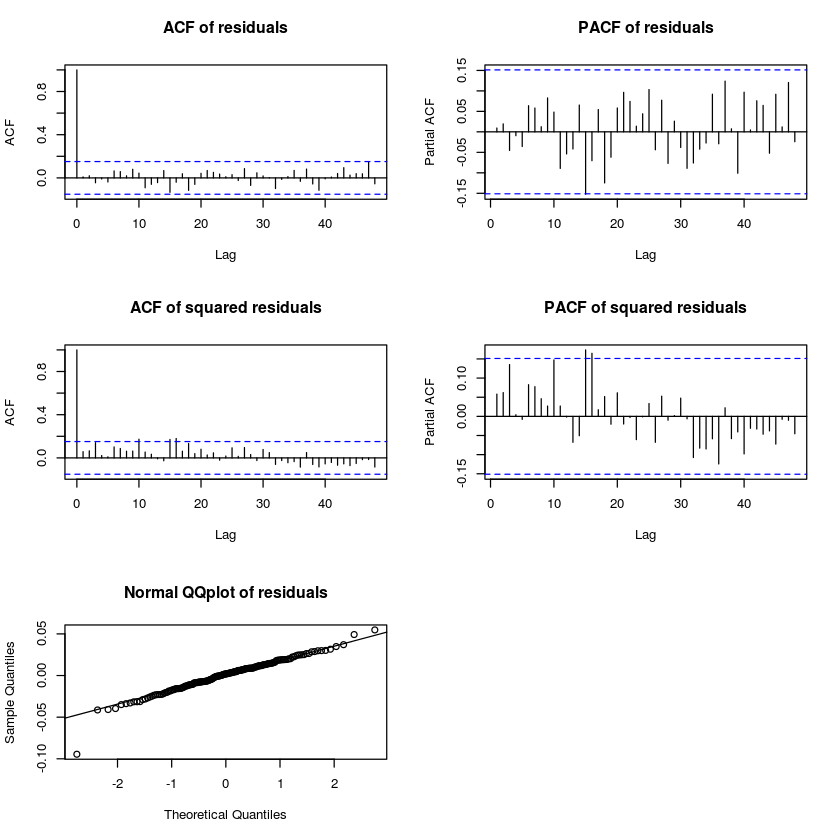

In [27]:
arma11residuals <- arma11fit$residuals
residuals <- ts(arma11residuals, frequency=12, start = c(1991, 1), end = c(2004, 12))

par(mfrow=c(3,2))

# set up the graphics
acf(ts(residuals,freq=1), 48, main="ACF of residuals")
pacf(ts(residuals,freq=1), 48, main="PACF of residuals")
acf(ts(residuals^2,freq=1), 48, main="ACF of squared residuals")
pacf(ts(residuals^2,freq=1), 48, main="PACF of squared residuals")
qqnorm(residuals,main="Normal QQplot of residuals")
qqline(residuals)

Based on the residual plots presented above:

* From the ACF and PACF of the residuals, it seems that the assumptions with respect to them are satisfied
* From the PACF fo the squared residuals it seems that there is an **heteroskedastisity** issue 
* From the Normal  QQPlot of residuals only 2-3 points are of the line. So we assume normality.

Due to the issue of heteroskedasticity, a **GARCH model** should be used with the aforementionded model.